In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_excel('data_audi.xlsx', sheet_name='data')

In [5]:
print(df.head())

   ID            NCHASSI    DIMMFIR DIMMFIN                LMODCOUF   VPRICAT  \
0   1  WAUZZZ4F07N091667 2007-01-16     NaT  A6 BERLINE TDI QUATTRO  47304.09   
1   2  WAUZZZ4F07N093080 2007-01-26     NaT          A6 BERLINE TDI  31752.07   
2   3  WAUZZZ4F07N094391 2007-01-03     NaT          A6 BERLINE TDI  33307.07   
3   4  WAUZZZ4F07N094584 2007-01-10     NaT          A6 BERLINE TDI  29644.38   
4   5  WAUZZZ4F07N094584 2007-01-10     NaT          A6 BERLINE TDI  29644.38   

    VPRIBAS   VPRIFAC  QCYLIND  QCARKWS    ...     CSEXEXX  \
0  38289.26  42542.97     2967      155    ...           M   
1  28396.69  28591.67     1968      100    ...           M   
2  28074.38  29975.62     1968      100    ...           M   
3  28074.38  26431.28     1968      100    ...         NaN   
4  28074.38  26431.28     1968      100    ...         NaN   

          TYPE_CLIENT  AUDI_AVANT PRIX_DIFF_BASE_CAT PRIX_REDUCTION B2BB2C  \
0     LEA Part. Cond.         NaN            9014.83       0.1

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66735 entries, 0 to 66734
Data columns (total 30 columns):
ID                    66735 non-null int64
NCHASSI               66735 non-null object
DIMMFIR               66735 non-null datetime64[ns]
DIMMFIN               4980 non-null datetime64[ns]
LMODCOUF              66735 non-null object
VPRICAT               66735 non-null float64
VPRIBAS               66735 non-null float64
VPRIFAC               66735 non-null float64
QCYLIND               66735 non-null int64
QCARKWS               66735 non-null int64
CENERGY               66735 non-null int64
CMODPRO               66735 non-null object
NCLIPRO               66735 non-null int64
FCLIPRO               66735 non-null object
CCATCLI               25773 non-null object
CTITJUR               65757 non-null object
CLANGUE               66732 non-null float64
CPOSTAL               66735 non-null int64
CPAYSXX               66735 non-null object
DNAISSA               6798 non-null object

In [45]:
df.describe()

,ID,VPRICAT,VPRIBAS,VPRIFAC,QCYLIND,QCARKWS,CENERGY,NCLIPRO,CLANGUE,CPOSTAL,PRIX_DIFF_BASE_CAT,PRIX_REDUCTION,PRIX_REDUCTION_INT,IMMAT_YEAR,IMMAT_FIN
count,66735.000000,66735.000000,66735.000000,66735.000000,66735.000000,66735.000000,66735.000000,6.673500e+04,66732.000000,66735.000000,66735.000000,66719.000000,66719.000000,66735.000000,66735.000000
mean,33368.000000,32801.708668,27313.087226,30044.263586,2098.903724,103.780265,1.970615,2.235299e+09,1.603054,3534.371994,5488.621443,0.083378,8.346333,2007.952409,0.074624
std,19264.879444,9608.280287,6729.553377,8767.960697,370.207851,25.746490,0.169769,2.045875e+09,0.492991,2839.099004,4458.612849,0.026287,2.641318,0.736217,0.262785
min,1.000000,0.000000,0.000000,13754.190000,1390.000000,75.000000,1.000000,8.000000e+01,1.000000,1000.000000,-123361.320000,-0.316569,-32.000000,2007.000000,0.000000
25%,16684.500000,25961.900000,23185.950000,23978.170000,1968.000000,88.000000,2.000000,1.000639e+09,1.000000,1190.000000,2470.000000,0.065303,7.000000,2007.000000,0.000000
50%,33368.000000,31512.730000,25632.230000,28844.430000,1968.000000,100.000000,2.000000,1.001890e+09,2.000000,2180.000000,4740.000000,0.075014,8.000000,2008.000000,0.000000
75%,50051.500000,37548.265000,30458.680000,33944.835000,1968.000000,103.000000,2.000000,5.000032e+09,2.000000,4900.000000,7158.100000,0.099392,10.000000,2008.000000,0.000000
max,66735.000000,141533.880000,123361.320000,125379.700000,5934.000000,426.000000,3.000000,8.000017e+09,4.000000,9992.000000,102467.230000,0.675722,68.000000,2009.000000,1.000000


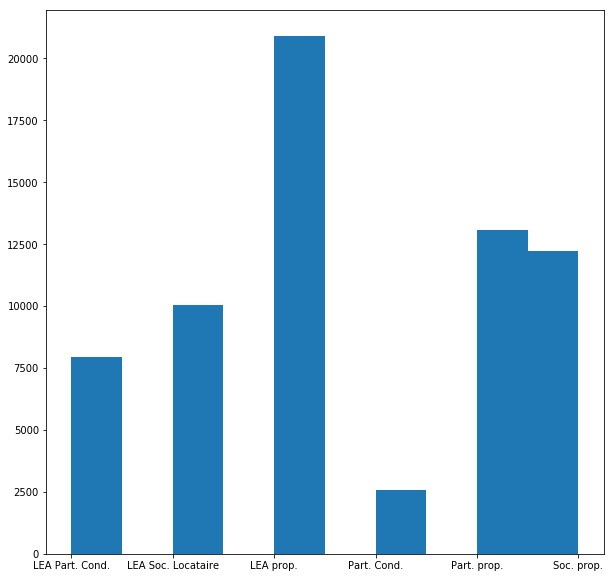

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

plt.hist(df['TYPE_CLIENT'])
plt.show()

In [ ]:
plt.hist(df['TYPE_CLIENT'])
plt.show()

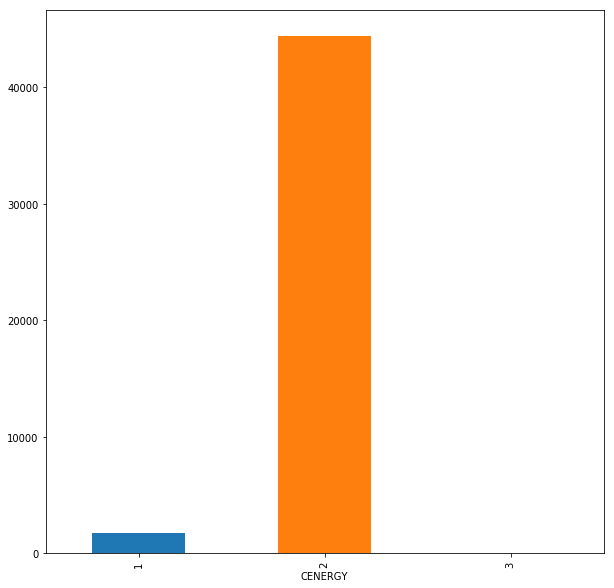

In [66]:


df_date = df.groupby(['IMMAT_YEARMONTH','CENERGY'])['NCHASSI'].nunique().reset_index()
df_date.columns = ['IMMAT_YEARMONTH','CENERGY','amount']

df_date.groupby('CENERGY')['amount'].sum().plot(kind='bar', x='CENERGY')

plt.show()


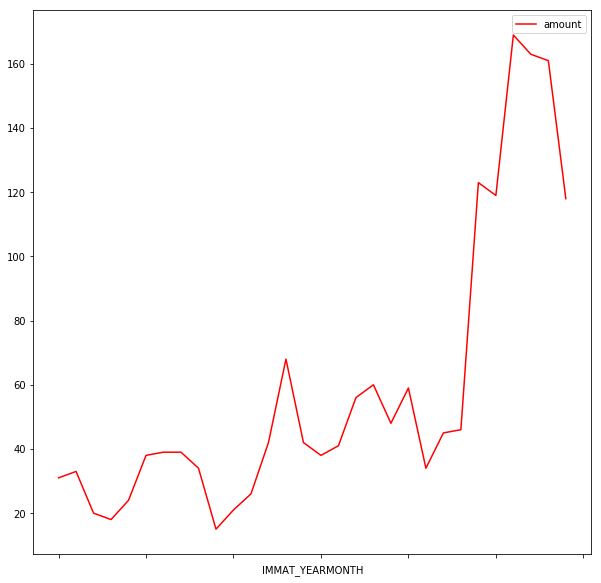

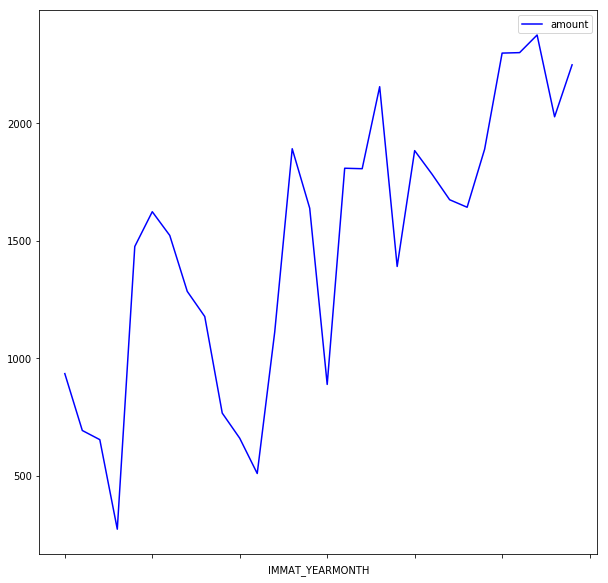

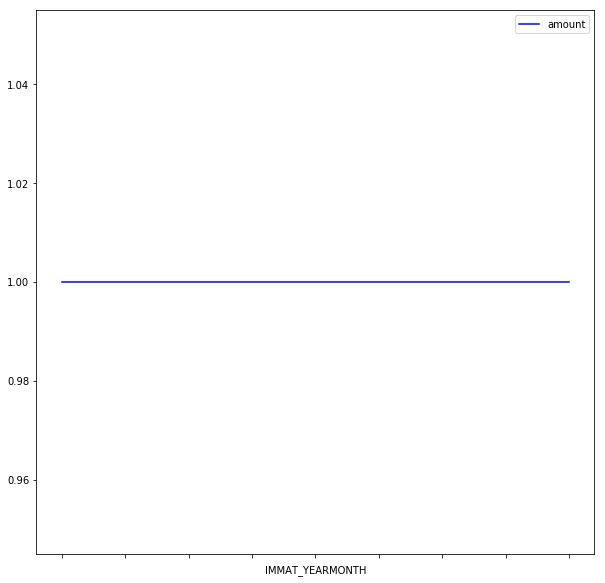

In [67]:

df_1 = df_date[df_date['CENERGY'] == 1][['IMMAT_YEARMONTH','amount']]
df_2 = df_date[df_date['CENERGY'] == 2][['IMMAT_YEARMONTH','amount']]
df_3 = df_date[df_date['CENERGY'] == 3][['IMMAT_YEARMONTH','amount']]



df_1.plot(kind='line',x='IMMAT_YEARMONTH', y='amount', color='red')
df_2.plot(kind='line',x='IMMAT_YEARMONTH', y='amount', color='blue')
df_3.plot(kind='line',x='IMMAT_YEARMONTH', y='amount', color='blue')


plt.show()

In [35]:
df_date = df.groupby(['IMMAT_YEARMONTH','CENERGY'])['NCHASSI'].nunique().reset_index()


In [61]:
df_dies = df[df['LMODCOUF'].str.contains('TDI',regex=False)]
print(df_dies.groupby('CENERGY')['NCHASSI'].nunique())

CENERGY
2    40615
Name: NCHASSI, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66735 entries, 0 to 66734
Data columns (total 29 columns):
ID                    66735 non-null int64
NCHASSI               66735 non-null object
DIMMFIR               66735 non-null datetime64[ns]
DIMMFIN               4980 non-null datetime64[ns]
LMODCOUF              66735 non-null object
VPRICAT               66735 non-null float64
VPRIBAS               66735 non-null float64
VPRIFAC               66735 non-null float64
QCYLIND               66735 non-null int64
QCARKWS               66735 non-null int64
CENERGY               66735 non-null int64
CMODPRO               66735 non-null object
NCLIPRO               66735 non-null int64
FCLIPRO               66735 non-null object
CCATCLI               25773 non-null object
CTITJUR               65757 non-null object
CLANGUE               66732 non-null float64
CPOSTAL               66735 non-null int64
CPAYSXX               66735 non-null object
DNAISSA               6798 non-null object

In [136]:
import datetime
import numpy as np
from sklearn.preprocessing import StandardScaler
#
df_cust_r = df.groupby('NCLIPRO')['DIMMFIR'].max().reset_index()
df_cust_r.columns = ['ID','last_buy']
df_cust_r.info()
df_cust_r['recency'] = (datetime.datetime.now() - df_cust_r['last_buy'])
df_cust_r['recency'] = df_cust_r['recency']
df_cust_r['recency'] = pd.to_timedelta(df_cust_r['recency'])

perc_rec = df_cust_r['recency'].quantile([0,0.2,0.4,0.6,0.8,1])
df_cust_r['rec_score'] = pd.cut(df_cust_r, bins= perc_rec, labels=['1','2','3','4','5'])





df_cust_f = df.groupby('NCLIPRO')['DIMMFIR'].nunique().reset_index()
df_cust_f.columns = ['ID','frequency']

perc_freq = df_cust_f['frequency'].quantile([0.2,0.4,0.6,0.8,1])
df_cust_f['freq_score'] = pd.cut(df_cust_f, bins= perc_freq, labels=['1','2','3','4','5'])


df_cust_m = df.groupby('NCLIPRO')['VPRICAT'].sum().reset_index()
df_cust_m.columns = ['ID','monetary']

rfm = pd.merge(pd.merge(df_cust_r,df_cust_f,on='ID'),df_cust_m,on='ID')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37212 entries, 0 to 37211
Data columns (total 2 columns):
ID          37212 non-null int64
last_buy    37212 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 581.5 KB


ValueError: Bin edges must be unique: array([  1.,   1.,   1.,   1., 584.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [135]:

perc_freq = df_cust_f['frequency'].quantile([0.2,0.4,0.6,0.8])